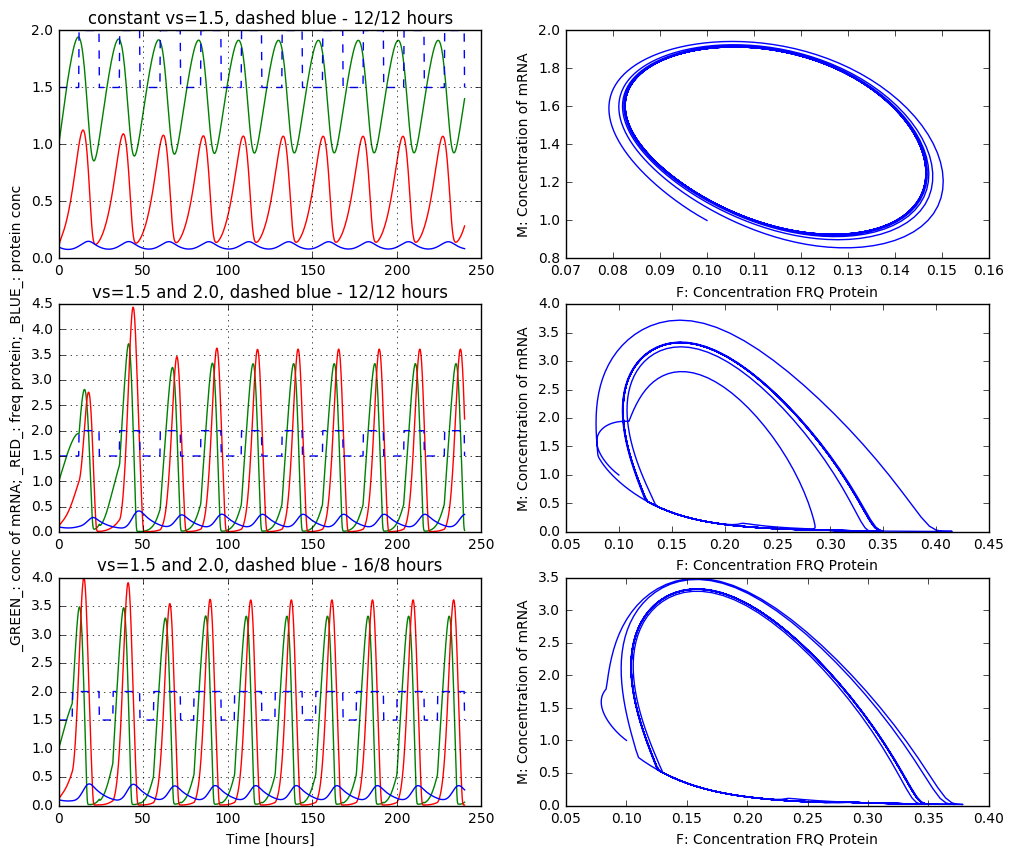

In [9]:
#Task 3(1) Perform simulations to show, under which conditions a 12-12 h light-dark stimulus is able to entrain the intrinsic Neurospora clock.

from scipy.integrate import odeint
import numpy
import matplotlib.pyplot as plt


start = 0
end = 240
steps = 1000
initial_conditions = [1, .1, .1]
t = numpy.linspace(start, end, steps)


v_s = 1.5
v_m = 1.5
v_d = 1.0

k_s = 0.5
K = 0.2
K_m = 0.15
K_d = 0.15
k_in = 0.02
k_out = 0.1
n = 4

# if k_in = 0.0.24 then hours in a period: 21.5836604098

def period_12_12_hours():
    """
    generate array for alternating value v_s
    """
    array_v = numpy.zeros(len(t))
    for i in range(len(t)):
        if int(t[i] / 12) % 2 == 0:  # Task 2 - 12/12 hour period
            array_v[i] = 1.5
        else:
            array_v[i] = 2.0
    return array_v


def period_8_16_hours():
    """
    generate array for alternating value v_s
    """
    array_v = numpy.zeros(len(t))
    for i in range(len(t)):
        if int(t[i] / 8) % 3 == 0:  # Task 4 - 16/8 hour period
            array_v[i] = 1.5
        else:
            array_v[i] = 2.0
    return array_v


def equation_constant(y, t):
    """
    Solve differential equation with constant v_s
    """
    #v_s = 1.5
    M = y[0]
    F_c = y[1]
    F_n = y[2]
    M_result = ((v_s * (K**n) / (K**n + F_n**n))) - ((v_m * M) / (K_m + M))
    F_c_result = (k_s * M) - ((v_d * (F_c) / (K_d + F_c))) - (k_in * F_c) + (k_out * F_n)
    F_n_result = (k_in * F_c) - (k_out * F_n)
    return M_result, F_c_result, F_n_result


def equation_alt_vs_12_12_hours(y, t):
    """
    Solve differential equation with alternating v_s over 12/12 hour period
    """
    M = y[0]
    F_c = y[1]
    F_n = y[2]

    if int(t/12) % 2 == 0:  # Task 2 - 12/12 hour period
        v_s = 1.5
    else:
        v_s = 2.0

    M_result = ((v_s * (K**n) / (K**n + F_n**n))) - ((v_m * M) / (K_m + M))
    F_c_result = (k_s * M) - ((v_d * (F_c) / (K_d + F_c))) - (k_in * F_c) + (k_out * F_n)
    F_n_result = (k_in * F_c) - (k_out * F_n)

    return M_result, F_c_result, F_n_result


def equation_alt_vs_16_8_hours(y, t):
    """
    Solve differential equation with alternating v_s over 16/8 hour period
    """
    M = y[0]
    F_c = y[1]
    F_n = y[2]

    if int(t/8) % 3 == 0:  # Task 4 - 16/8 hour period
        v_s = 1.5
    else:
        v_s = 2.0

    M_result = ((v_s * (K**n) / (K**n + F_n**n))) - ((v_m * M) / (K_m + M))
    F_c_result = (k_s * M) - ((v_d * (F_c) / (K_d + F_c))) - (k_in * F_c) + (k_out * F_n)
    F_n_result = (k_in * F_c) - (k_out * F_n)

    return M_result, F_c_result, F_n_result


plt.figure(num=1, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
for i in range(1, 7, 2):  # generate charts
    plt.subplot(3, 2, i)  # line charts
    plt.grid(True)

    if i == 1:
        # constant
        solution = odeint(equation_constant, initial_conditions, t)
        array_v = period_12_12_hours()

        plt.title('constant vs=1.5, dashed blue - 12/12 hours')
    if i == 3:
        # equation_alt_vs_12_12_hours
        solution = odeint(equation_alt_vs_12_12_hours, initial_conditions, t)
        array_v = period_12_12_hours()

        plt.title('vs=1.5 and 2.0, dashed blue - 12/12 hours')
        plt.ylabel('_GREEN_: conc of mRNA; _RED_: freq protein; _BLUE_: protein conc')

    if i == 5:
        # equation_alt_vs_16_8_hours
        solution = odeint(equation_alt_vs_16_8_hours, initial_conditions, t)
        array_v = period_8_16_hours()

        plt.title('vs=1.5 and 2.0, dashed blue - 16/8 hours')
        plt.xlabel('Time [hours]')

    M = solution[:, 0]
    F_c = solution[:, 1]
    F_n = solution[:, 2]


    plt.subplot(3, 2, i + 1)  # circle charts
    plt.plot(F_n, M)
    plt.xlabel('F: Concentration FRQ Protein')
    plt.ylabel('M: Concentration of mRNA')


    # line chart
    plt.subplot(3, 2, i)
    plt.plot(t, M, 'g')
    plt.plot(t, F_c, 'r')
    plt.plot(t, F_n, 'b')
    plt.plot(t, array_v, 'b--')

plt.show()
